In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
def saturation(val): #클램핑함수
  if val> 255:
    return 255
  elif val < 0:
    return 0
  else:
    return val

(256, 256, 3)
(256, 256)


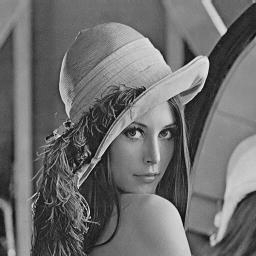

In [3]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena256.jpg')
print(img.shape)
gimg1 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

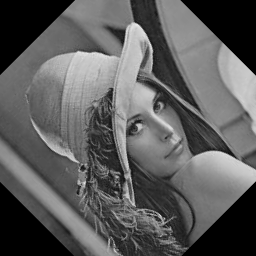

In [4]:
M = cv2.getRotationMatrix2D((128,128),45,1)
outimg = cv2.warpAffine(gimg1,M,(256,256))
cv2_imshow(outimg)

In [6]:
print(M)
print(M.shape)

[[  0.70710678   0.70710678 -53.01933598]
 [ -0.70710678   0.70710678 128.        ]]
(2, 3)


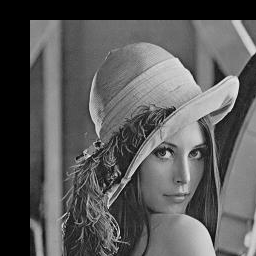

In [7]:
M2 = np.float32([[1,0,30],[0,1,20]])
outimg2 = cv2.warpAffine(gimg1,M2,(256,256))
cv2_imshow(outimg2)

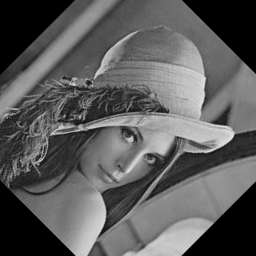

In [8]:
M3 = cv2.getRotationMatrix2D((128,128),-45,1)
outimg3 = cv2.warpAffine(gimg1,M3,(256,256))
cv2_imshow(outimg3)

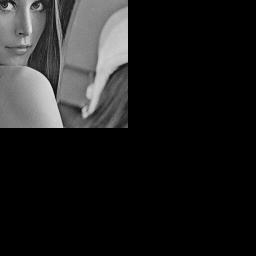

In [10]:
M4 = np.float32([[1,0,-128],[0,1,-128]])
outimg4 = cv2.warpAffine(gimg1,M4,(256,256))
cv2_imshow(outimg4)

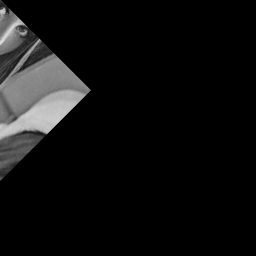

In [12]:
M5 = cv2.getRotationMatrix2D((0,0),-45,1)
outimg5 = cv2.warpAffine(outimg4,M5,(256,256))
cv2_imshow(outimg5)

In [13]:
print(M5)

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]]


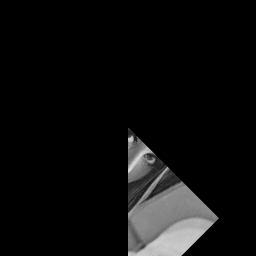

In [14]:
M6 = np.float32([[1,0,128],[0,1,128]])
outimg6 = cv2.warpAffine(outimg5,M6,(256,256))
cv2_imshow(outimg6)

어파인 변환을 실제 매트릭스로 만들어서 실행함


In [21]:
N1 = np.float32([[M4[0,0],M4[0,1],M4[0,2]],[M4[1,0],M4[1,1],M4[1,2]],[0,0,1]])
N2 = np.float32([[M5[0,0],M5[0,1],M5[0,2]],[M5[1,0],M5[1,1],M5[1,2]],[0,0,1]])
N3 = np.float32([[M6[0,0],M6[0,1],M6[0,2]],[M6[1,0],M6[1,1],M6[1,2]],[0,0,1]])
print(N1)

[[   1.    0. -128.]
 [   0.    1. -128.]
 [   0.    0.    1.]]


In [20]:
N4 = np.dot(N3,N2)
N5 = np.dot(N4,N1)
N6 = N2 = np.float32([[N5[0,0],N5[0,1],N5[0,2]],[N5[1,0],N5[1,1],N5[1,2]]])
print(N5)

[[  0.70710677  -0.70710677 128.        ]
 [  0.70710677   0.70710677 -53.019333  ]
 [  0.           0.           1.        ]]


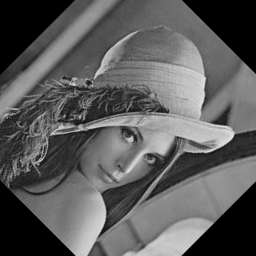

In [22]:
outimg7 = cv2.warpAffine(gimg1,N6,(256,256))
cv2_imshow(outimg7)